In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

data = pd.read_csv(r"team2\Dataset2\train25.csv")
x = data.drop(columns=["y"])
y = data["y"]

In [101]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_centroids(X, k):
    """Randomly pick k points as initial centroids."""
    indices = np.random.choice(len(X), k, replace=False)
    return X[indices]

def assign_clusters(X, centroids):
    """Assign each point to the nearest centroid."""
    distances = np.linalg.norm(X[:, None, :] - centroids[None, :, :], axis=2)  # (n_samples, k)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    """Update centroids as mean of points in each cluster."""
    return np.array([X[labels == j].mean(axis=0) for j in range(k)])

def kmeans(X, k, max_iters=100, tol=1e-4):
    """Run K-Means clustering on X."""
    X = np.asarray(X, dtype=float)

    # ensure shape (n_samples, n_features)
    if X.ndim == 1:
        X = X.reshape(-1, 1)

    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)

        if np.all(np.linalg.norm(new_centroids - centroids, axis=1) < tol):
            break
        centroids = new_centroids
    return labels, centroids

def plot_clusters(X, labels, centroids):
    """Plot clusters (works for 1D or 2D data)."""
    if X.shape[1] == 1:  # 1D data
        plt.scatter(X[:, 0], np.zeros_like(X[:, 0]), c=labels, cmap="viridis")
        plt.scatter(centroids[:, 0], np.zeros_like(centroids[:, 0]), 
                    c="red", marker="x", s=200)
        plt.xlabel("X")
        plt.title("K-Means Clustering (1D)")
    elif X.shape[1] == 2:  # 2D data
        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis")
        plt.scatter(centroids[:, 0], centroids[:, 1], 
                    c="red", marker="x", s=200)
        plt.xlabel("X1")
        plt.ylabel("X2")
        plt.title("K-Means Clustering (2D)")
    else:
        print("Plotting not supported for dimension > 2")
        return
    plt.show()



In [105]:
data = pd.read_csv(r"team2\Dataset2\train100.csv")
x = np.asarray(data.drop(columns=['y']))
y = np.asarray(data['y'])

[[-1.12487221 -1.35745354]
 [-0.4787149   0.87601795]
 [ 1.31476322 -0.59130001]]


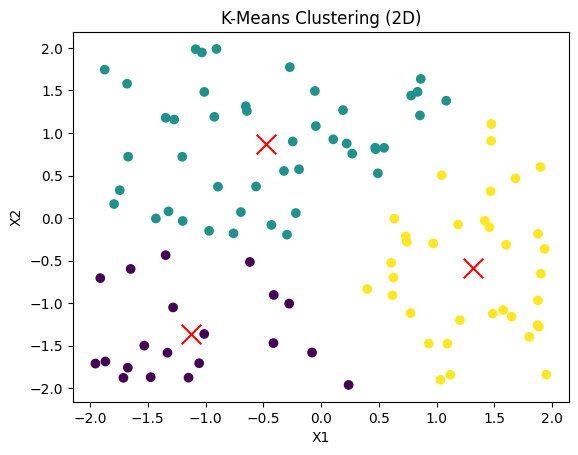

In [106]:
n = 3
labels, centroids = kmeans(x, n)
print(centroids)
plot_clusters(x, labels, centroids)

In [107]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_design_matrix(x: np.ndarray, mu: np.ndarray, s: float) -> np.ndarray:
    """Construct the Gaussian basis design matrix Φ for input x."""
    N = len(x)
    M = len(mu)
    phi = np.ones((N, M + 1))  # +1 for bias
    for j in range(M):
        phi[:, j + 1] = np.exp(-0.5 * ((x - mu[j]) / s) ** 2)
    return phi


def fit_ridge_regression_gaussian(x: np.ndarray, y: np.ndarray, mu: np.ndarray, s: float, lam: float) -> np.ndarray:
    """Fit ridge regression with Gaussian basis functions."""
    phi = gaussian_design_matrix(x, mu, s)
    identity = np.identity(phi.shape[1])
    return np.linalg.inv(lam * identity + phi.T @ phi) @ phi.T @ y


def predict_gaussian(x: np.ndarray, w: np.ndarray, mu: np.ndarray, s: float) -> np.ndarray:
    """Predict outputs using Gaussian basis functions."""
    phi = gaussian_design_matrix(x, mu, s)
    return phi @ w


def plot_fit_gaussian(x: np.ndarray, y: np.ndarray, w: np.ndarray, mu: np.ndarray, s: float, lam: float) -> None:
    """Plot training data and fitted Gaussian basis curve."""
    x_range = np.linspace(np.min(x), np.max(x), 200)
    y_pred = predict_gaussian(x_range, w, mu, s)

    plt.scatter(x, y, color="blue", label="Data")
    plt.plot(x_range, y_pred, color="red", label="Gaussian Basis Model")
    plt.title(f"Gaussian Basis Regression (M={len(mu)}, σ={s}, λ={lam}, N={len(x)})")
    plt.legend()
    plt.show()


def solve_gaussian(x: np.ndarray, y: np.ndarray, mu: np.ndarray, s: float, lam: float) -> None:
    """Solve ridge regression with Gaussian basis and plot the result."""
    w = fit_ridge_regression_gaussian(x, y, mu, s, lam)
    plot_fit_gaussian(x, y, w, mu, s, lam)


In [108]:
data = pd.read_csv(r"team2\Dataset1\train10.csv")
x = data['x']
y = data['y']

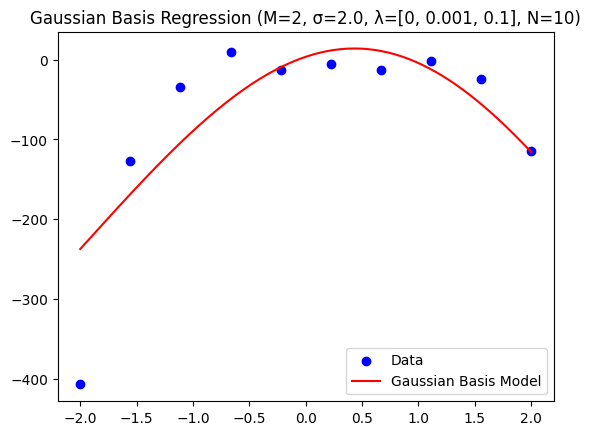

In [113]:
n = max(2, 0.08*len(x))
_, cent = kmeans(x, n)
s = (max(x) - min(x))/n
solve_gaussian(np.asarray(x), np.asarray(y), cent, s, lam)
